In [1]:
import numpy as np
import matplotlib.pyplot as plt
import midynet
import graphinf
import seaborn as sb
import networkx as nx

import pandas as pd

In [2]:
metrics = [
    nx.core_number,
    lambda _g: dict(nx.degree(_g)),
    nx.eigenvector_centrality,
    nx.closeness_centrality,
    nx.clustering,
    nx.pagerank,
]
metrics_names = [
    "k-core",
    "degree",
    "eigen",
    "closeness",
    "clustering",
    "pagerank",
]

In [4]:
from sklearn.feature_selection import mutual_info_regression, r_regression, f_regression

In [187]:
J = np.linspace(0, 1, 50)
num_samples = 50
df = None
# score["coupling"] = J
G = graphinf.random_graph.ErdosRenyiModel(100, 250, with_parallel_edges=False, with_self_loops=False)
for j in J:
    print(j)
    X = graphinf.data_model.dynamics.GlauberDynamics(graph_prior=G, length=100, coupling=j)
    x, y = None, None
    
    for _ in range(num_samples):
        X.sample()
        g = nx.from_numpy_array(np.array(X.get_graph().get_adjacency_matrix()))
        ts = np.array(X.get_past_states())
        if y is None:
            y = ts.mean(-1)
        else:
            y = np.concatenate([y, ts.mean(-1)])
        _x = np.array([list(m(g).values()) for m in metrics]).T
        if x is None:
            x = _x * 1
        else:
            x = np.concatenate([x, _x], axis=0)
    scores = {k: [v] for k, v in zip(metrics_names, mutual_info_regression(x, y))}
    if df is None:
        df = pd.DataFrame(scores)
    else:
        df = pd.concat([df, pd.DataFrame.from_dict(scores)])
#     print(df)
# plt.plot(J, score)
    

0.0
0.02040816326530612
0.04081632653061224
0.061224489795918366
0.08163265306122448
0.1020408163265306
0.12244897959183673
0.14285714285714285
0.16326530612244897
0.18367346938775508
0.2040816326530612
0.22448979591836732
0.24489795918367346
0.26530612244897955
0.2857142857142857
0.3061224489795918
0.32653061224489793
0.3469387755102041
0.36734693877551017
0.3877551020408163
0.4081632653061224
0.42857142857142855
0.44897959183673464
0.4693877551020408
0.4897959183673469
0.5102040816326531
0.5306122448979591
0.5510204081632653
0.5714285714285714
0.5918367346938775
0.6122448979591836
0.6326530612244897
0.6530612244897959
0.673469387755102
0.6938775510204082
0.7142857142857142
0.7346938775510203
0.7551020408163265
0.7755102040816326
0.7959183673469387
0.8163265306122448
0.836734693877551
0.8571428571428571
0.8775510204081632
0.8979591836734693
0.9183673469387754
0.9387755102040816
0.9591836734693877
0.9795918367346939
1.0


In [189]:
df["coupling"] = J

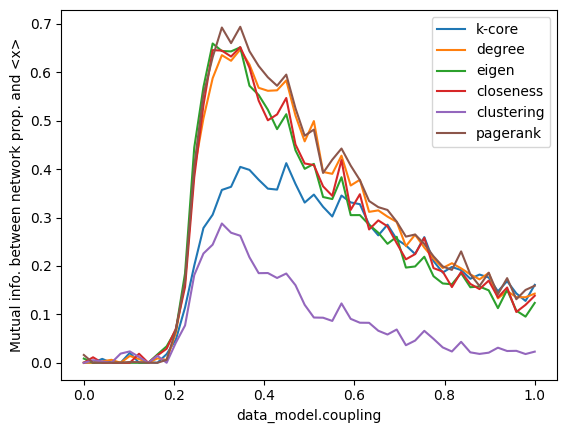

In [190]:
for n in metrics_names:
    sb.lineplot(df, x="coupling", y=n, label=n)
plt.xlabel("data_model.coupling")
plt.ylabel("Mutual info. between network prop. and <x>")
plt.savefig("pred-heuristics.png")

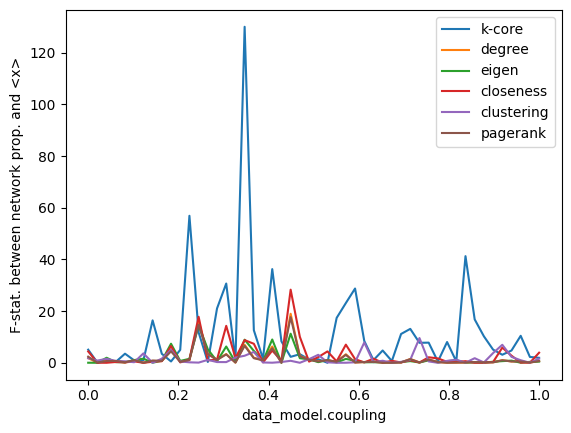

In [185]:
for n in metrics_names:
    sb.lineplot(df, x="coupling", y=n, label=n)
plt.xlabel("data_model.coupling")
plt.ylabel("F-stat. between network prop. and <x>")
plt.savefig("pred-heuristics.png")

In [70]:
from sklearn.feature_selection import r_regression, chi2, f_classif, mutual_info_classif

from collections import defaultdict

In [104]:
score = []
J = np.linspace(0, 2, 40)
num_samples = 10
G = graphinf.random_graph.ErdosRenyiModel(1000, 2500, with_parallel_edges=False, with_self_loops=False)
# scores = {}
for j in J:
    X = graphinf.data_model.dynamics.GlauberDynamics(graph_prior=G, length=100, coupling=j)
    mi = defaultdict(list)
    c2 = defaultdict(list)
    f = defaultdict(list)
    r = defaultdict(list)
    mi["coupling"] = [j]* num_samples
    c2["coupling"] = [j]* num_samples
    f["coupling"] = [j]* num_samples
    r["coupling"] = [j]* num_samples
    
    for _ in range(num_samples):
        X.sample()
        adj = np.array(X.get_graph().get_adjacency_matrix())
        g = nx.from_numpy_array(adj)
        ts = np.array(X.get_past_states())
        y = ts[:, -1]
        x = np.array([list(m(g).values()) for m in metrics]).T
        
        for m, func in zip(
            [c2, mi, f, r], 
            [
                lambda x, y: chi2(x, y)[0], 
                mutual_info_classif, 
                lambda x, y: f_classif(x, y)[0],
                lambda x, y: r_regression(x, y)
            ]
        ):
            for k, v in zip(metrics_names, func(x, y)):
                m[k].append(v)
    for k, s in zip(["c2", "mi", "f", "r"], [c2, mi, f, f]):
        
        if k not in scores:
            scores[k] = pd.DataFrame(s)
        else:
            scores[k] = pd.concat([scores[k], pd.DataFrame(s)], ignore_index=True)
    print(j)
    

0.0
0.05128205128205128
0.10256410256410256
0.15384615384615385
0.20512820512820512
0.2564102564102564
0.3076923076923077
0.358974358974359
0.41025641025641024
0.4615384615384615
0.5128205128205128
0.5641025641025641
0.6153846153846154
0.6666666666666666
0.717948717948718
0.7692307692307692
0.8205128205128205
0.8717948717948718
0.923076923076923
0.9743589743589743
1.0256410256410255
1.0769230769230769
1.1282051282051282
1.1794871794871795
1.2307692307692308
1.282051282051282
1.3333333333333333
1.3846153846153846
1.435897435897436
1.4871794871794872
1.5384615384615383
1.5897435897435896
1.641025641025641
1.6923076923076923
1.7435897435897436
1.7948717948717947
1.846153846153846
1.8974358974358974
1.9487179487179487
2.0


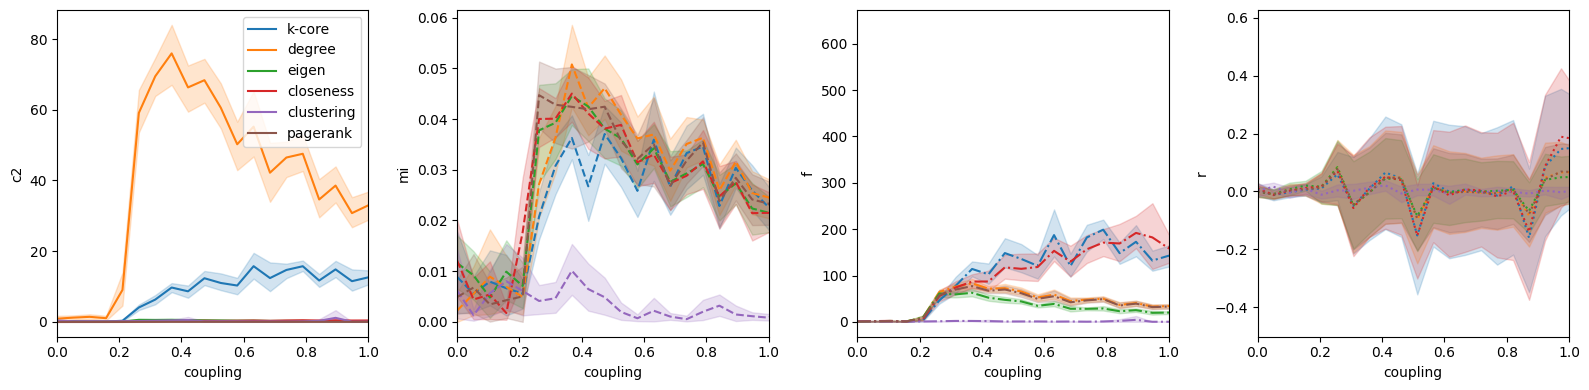

In [153]:
fig ,ax = plt.subplots(1, 4, figsize=(16, 4))

for i, (ls, (k, s)) in enumerate(zip(["-", "--", "-.", "dotted"], scores.items())):
    for m in metrics_names:
        if ls == "-":
            label = m
        else: 
            label=None
        sb.lineplot(scores[k], y=m, x="coupling", label=label, linestyle=ls, ax=ax[i])
    ax[i].set_ylabel(k)
    ax[i].set_xlim([0, 1])
fig.tight_layout()

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [148]:
# df = None
J = np.linspace(0, 1, 20)
for j in J:
    X = graphinf.data_model.dynamics.GlauberDynamics(
        graph_prior=G,
        length=100,
        coupling=j
    )
    out = defaultdict(list)
    for _ in range(num_samples):
        X.sample()
        adj = np.array(X.get_graph().get_adjacency_matrix())
        g = nx.from_numpy_array(adj)
        ts = np.array(X.get_past_states())
        y = ts.mean(-1)
        x = np.array([list(m(g).values()) for m in metrics]).T

        model = LinearRegression()
        model.fit(x, y)
        out["score"].append(model.score(x, y))
        out["coupling"].append(j)
    if df is None:
        df = pd.DataFrame(out)
    else:
        df = pd.concat([df, pd.DataFrame(out)], ignore_index=False)
    print(j)

0.0
0.05263157894736842
0.10526315789473684
0.15789473684210525
0.21052631578947367
0.2631578947368421
0.3157894736842105
0.3684210526315789
0.42105263157894735
0.47368421052631576
0.5263157894736842
0.5789473684210527
0.631578947368421
0.6842105263157894
0.7368421052631579
0.7894736842105263
0.8421052631578947
0.894736842105263
0.9473684210526315
1.0


Text(0, 0.5, 'Determination coefficient R^2')

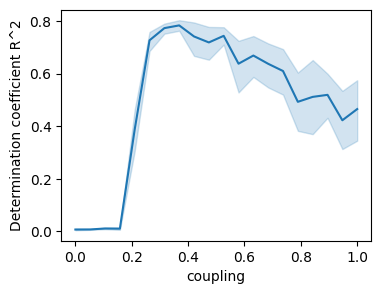

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sb.lineplot(df, y="score", x="coupling", ax=ax)
plt.ylabel("Determination coefficient R^2")